## ID: 16010363ff01f000

# Objectives
- 1. Country with highest world cup title
- 2. Player with Highest Golden Boot Award
- 3. Player with Highest Golden Ball Award
- 4. Highest Refree that blew in final
- 5. Country with highest appearance in Final but didn't get the cup

## Data Source
All the datas were scraped by **Damilare Ayoola** from wikipedia.org

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

In [2]:
#loading and merging all the datasets
folder_name = 'data'
files = glob.glob(os.path.join(folder_name, "*.csv"))
df = pd.concat((pd.read_csv(f, low_memory=False) for f in files), ignore_index = True)

In [3]:
df.head()

,Team,G,Pld,W,D,L,Pts,GF,GA,GD,Golden Ball,Golden Boot,Golden Glove,Prize,Year,Refree,Host,Runner_up,Attendance
0,Uruguay,3,4.0,4.0,0.0,0.0,15.0,3.0,12.0,8.0,NaN,NaN,NaN,NaN,1930,John Langenus,Uruguay,Argentina,68346
1,Italy,NaN,5.0,4.0,1.0,0.0,12.0,3.0,9.0,9.0,NaN,NaN,NaN,NaN,1934,Ivan Eklind,Italy,Czechoslovakia,55000
2,Italy,NaN,4.0,4.0,0.0,0.0,11.0,5.0,6.0,8.0,NaN,NaN,NaN,35000000.0,1938,Georges Capdeville,France,Hungary,45000
3,Uruguay,4,4.0,3.0,1.0,0.0,15.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,1950,George Reader,Brazil,Brazil,173850
4,West Germany,2,6.0,5.0,0.0,1.0,25.0,14.0,11.0,10.0,NaN,NaN,NaN,NaN,1954,William Ling,Switzerland,Hungary,62500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          22 non-null     object 
 1   G             19 non-null     object 
 2   Pld           20 non-null     float64
 3   W             20 non-null     float64
 4   D             20 non-null     float64
 5   L             20 non-null     float64
 6   Pts           20 non-null     float64
 7   GF            20 non-null     float64
 8   GA            20 non-null     float64
 9   GD            20 non-null     float64
 10  Golden Ball   10 non-null     object 
 11  Golden Boot   12 non-null     object 
 12  Golden Glove  8 non-null      object 
 13  Prize         3 non-null      float64
 14  Year          22 non-null     int64  
 15  Refree        22 non-null     object 
 16  Host          22 non-null     object 
 17  Runner_up     22 non-null     object 
 18  Attendance    22 non-null     in

**Drop variables that have no impact to our analysis**

In [5]:
variables = ['Team', 'Golden Ball', 'Golden Boot', 'Golden Glove', 'Year', 'Refree', 'Host', 'Runner_up', 'Attendance']
for i in df.columns:
    if i in variables:
        pass
    else:
        df.drop(i, axis=1, inplace = True)
        

In [6]:
df.head()

,Team,Golden Ball,Golden Boot,Golden Glove,Year,Refree,Host,Runner_up,Attendance
0,Uruguay,NaN,NaN,NaN,1930,John Langenus,Uruguay,Argentina,68346
1,Italy,NaN,NaN,NaN,1934,Ivan Eklind,Italy,Czechoslovakia,55000
2,Italy,NaN,NaN,NaN,1938,Georges Capdeville,France,Hungary,45000
3,Uruguay,NaN,NaN,NaN,1950,George Reader,Brazil,Brazil,173850
4,West Germany,NaN,NaN,NaN,1954,William Ling,Switzerland,Hungary,62500


In [7]:
#rename the columns name for simplisity and consistency
df = df.rename(columns={'Golden Ball':'Golden_Ball', 'Golden Boot':'Golden_Boot', 'Golden Glove':'Golden_Glove', 
                        'Runner_up':'Runner_Up', 'Team':'Winner'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Winner        22 non-null     object
 1   Golden_Ball   10 non-null     object
 2   Golden_Boot   12 non-null     object
 3   Golden_Glove  8 non-null      object
 4   Year          22 non-null     int64 
 5   Refree        22 non-null     object
 6   Host          22 non-null     object
 7   Runner_Up     22 non-null     object
 8   Attendance    22 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 1.7+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Winner           0
Golden_Ball     12
Golden_Boot     10
Golden_Glove    14
Year             0
Refree           0
Host             0
Runner_Up        0
Attendance       0
dtype: int64

There are missing values in the award because the award wasn't present in the early years of World Cup 
<br>**Replace the null with no_award**

In [11]:
df.fillna('no_award', inplace=True)

In [12]:
df.isnull().sum()

Winner          0
Golden_Ball     0
Golden_Boot     0
Golden_Glove    0
Year            0
Refree          0
Host            0
Runner_Up       0
Attendance      0
dtype: int64

### 1. Country with highest world cup title

In [13]:
#check the unique countries that have collected the world cup title
df.Winner.unique()

array(['Uruguay', 'Italy', 'West Germany', 'Brazil', 'England',
       'Argentina', 'France', 'Spain', 'Germany'], dtype=object)

**`Germany` and `West Germany` are thesame country**
<br>**Rename `West Germany` to `Germany`**

In [14]:
#df[df['Winner'] == 'West Germany'] = 'Germany'
df.Winner = df.Winner.replace({'West Germany': 'Germany'})

In [15]:
#Check if it's been renamed
df.Winner.unique()

array(['Uruguay', 'Italy', 'Germany', 'Brazil', 'England', 'Argentina',
       'France', 'Spain'], dtype=object)

`West Germany` has been renamed to `Germany`

In [16]:
#check the unique countries for runner up as well if we have thesame isuse of Germany and West Germany
df.Runner_Up.unique()

array(['Argentina', 'Czechoslovakia', 'Hungary', 'Brazil', 'Sweden',
       'West Germany', 'Italy', 'Netherlands', 'Germany', 'France',
       'Croatia'], dtype=object)

**We have same issue of `Germany` and `West Germany`**
<br>**Rename it 

In [17]:
#df[df['Runner_Up'] == 'West Germany'] = 'Germany'
df.Runner_Up = df.Runner_Up.replace({'West Germany': 'Germany'})

In [18]:
df.Runner_Up.unique()

array(['Argentina', 'Czechoslovakia', 'Hungary', 'Brazil', 'Sweden',
       'Germany', 'Italy', 'Netherlands', 'France', 'Croatia'],
      dtype=object)

#### The Country with Highest World Cup Title

In [19]:
df.Winner.value_counts()

Brazil       5
Italy        4
Germany      4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: Winner, dtype: int64

Text(0, 0.5, 'Numbers')

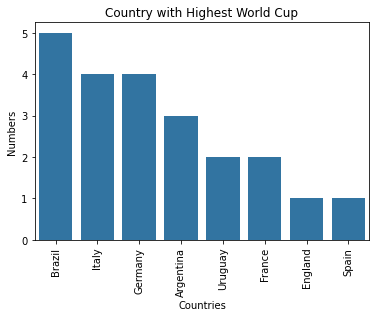

In [20]:
base_color = sb.color_palette()[0]
winning_order = df.Winner.value_counts().index
sb.countplot(data=df, x = 'Winner', color=base_color, order=winning_order)
plt.xticks(rotation=90);
plt.title("Country with Highest World Cup");
plt.xlabel('Countries')
plt.ylabel('Numbers')

#### Brazil Has The Highest World Cup Title.

In [21]:
df.groupby(['Year', 'Winner'])['Winner'].count().sort_values(ascending=False).head(10)

Year  Winner 
1930  Uruguay    1
1934  Italy      1
2018  France     1
2014  Germany    1
2010  Spain      1
2006  Italy      1
2002  Brazil     1
1998  France     1
1994  Brazil     1
1990  Germany    1
Name: Winner, dtype: int64

### 2. Player with Highest Golden Boot Award

In [22]:
df.Golden_Boot.value_counts()

no_award               10
Gerd Müller             1
Paolo Rossi             1
Gary Lineker            1
Salvatore Schillaci     1
Hristo Stoichkov        1
Davor Šuker             1
Ronaldo                 1
Miroslav Klose          1
Thomas Müller           1
James Rodríguez         1
Harry Kane              1
Kylian Mbappé           1
Name: Golden_Boot, dtype: int64

#### Nobody has ever gotten golden boot award twice

### 3. Player with Highest Golden Ball Award

In [23]:
df.Golden_Ball.value_counts()

no_award               12
Lionel Messi            2
Diego Maradona          1
Salvatore Schillaci     1
Romário                 1
Ronaldo                 1
Oliver Kahn             1
Zinedine Zidane         1
Diego Forlán            1
Luka Modrić             1
Name: Golden_Ball, dtype: int64

In [24]:
#remove the no_award from the result
golden_ball_award = pd.DataFrame(df.Golden_Ball.value_counts())
golden_ball_award = golden_ball_award.iloc[1:]

Text(0, 0.5, 'Numbers')

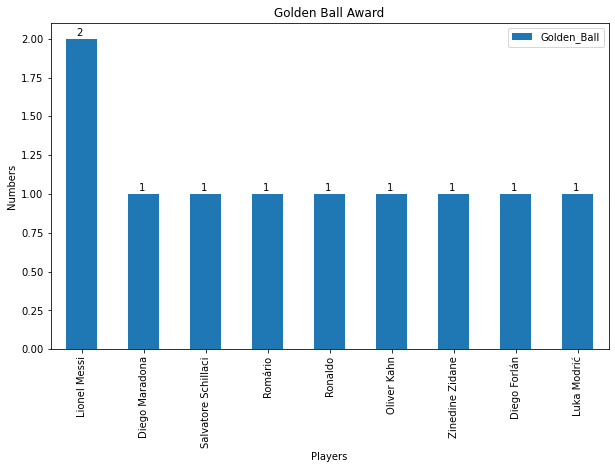

In [25]:
#Bar chart of brands
gold_ball = golden_ball_award.plot.bar(figsize=(10,6))
for p in gold_ball.patches:
    gold_ball.annotate(p.get_height(), (p.get_x() + (p.get_width()/3), p.get_height()+0.02))
plt.title("Golden Ball Award");
plt.xlabel('Players')
plt.ylabel('Numbers')

#### `Lionel Mercy` Has The Highest Golden Ball Award

### 4. Highest Refree that blew in final

In [26]:
df.Refree.value_counts()

John Langenus            1
Ivan Eklind              1
Néstor Pitana            1
Nicola Rizzoli           1
Howard Webb              1
Horacio Elizondo         1
Pierluigi Collina        1
Said Belqola             1
Sándor Puhl              1
Edgardo Codesal          1
Romualdo Arppi Filho     1
Arnaldo Cézar Coelho     1
Sergio Gonella           1
Jack Taylor              1
Rudi Glöckner            1
Gottfried Dienst         1
Nikolay Latyshev         1
Maurice Guigue           1
William Ling             1
George Reader            1
Georges Capdeville       1
Abdulrahman Al-Jassim    1
Name: Refree, dtype: int64

#### All the refree that blew in final has only blown once

### 5. Country with highest appearance in Final but didn't get the cup

In [27]:
df.Runner_Up.value_counts()

Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
France            2
Sweden            1
Croatia           1
Name: Runner_Up, dtype: int64

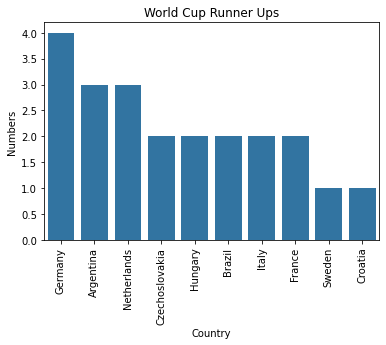

In [28]:
base_color = sb.color_palette()[0]
winning_order = df.Runner_Up.value_counts().index
sb.countplot(data=df, x = 'Runner_Up', color=base_color, order=winning_order)
plt.title('World Cup Runner Ups')
plt.xlabel('Country')
plt.ylabel('Numbers')
plt.xticks(rotation=90);

#### Germany has appeared in World Cup Final 4 times without winning the title, and has also appeard 4 times with wins
#### In Total, Germany has appeard in world cup final 8 times, with 4 wins